In [2]:
from sympy import * 
from sympy.abc import *
import numpy as np
import matplotlib.pyplot as plt

init_printing()

import warnings
warnings.filterwarnings("ignore")

sa, sm, sf_, sut, nf, ktf, ktt = symbols("\sigma'_a \sigma'_m S_f S_{ut}, N_f k_{tf} k_{tt}") 

#Função pra calcular sf'
def Sf_l(kc, kd, sf):
    ka = 1 #flexão equivalente
    kb = 1.189*((D*1000)**-0.097)
    #kb = D*1.189*((1000)**-0.097)
    return(ka*kb*kc*kd*(0.5*sf))

#Critério de falha
falha = Eq(sa/sf_ + sm/sut, 1/nf)
falha

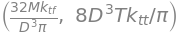

In [19]:
#Tensões reais de flexão
flex = ktf*(32*M/(pi*D**3))

#Tensões reais de torção
torc = ktt*((16*T/2)/pi*D**3)
flex, torc

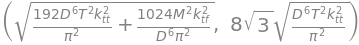

In [20]:
#Tensão de von-misses
sa = sqrt(flex**2 + 3*torc**2)
sm = sqrt(3*torc**2) #verficar - Esta condição é para sm=0 e ta=tm
sa, sm

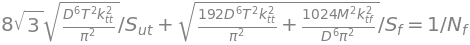

In [21]:
#Critério de falha
falha = Eq(sa/sf_ + sm/sut, 1/nf)
falha

### Avaliação numérica do problema - aula 5

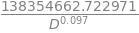

In [39]:
sf_ = Sf_l(0.75, 0.814, 745*1e6)
sf_

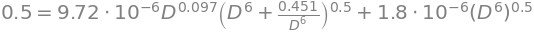

In [40]:
ktf, ktt =  2.216, 3.04
M = 40 #N.m - Momento de flexão - puramente alternado sm=0
T = 100.27 #N.m - Torque de torção considerando Tmin=0

sut = 745*1E6
nf = 2
pi = np.pi

#Tensões reais de flexão
flex = ktf*(32*M/(pi*D**3))
#Tensões reais de torção
torc = ktt*((16*T/2)/pi*D**3)

#Tensão de von-misses
sa = sqrt((flex**2) + (3*(torc**2)))
sm = sqrt(3*(torc**2)) #verficar - Esta condição é para sm=0 e ta=tm

#Critério de falha
falha = Eq((1/nf), (sa/sf_) + (sm/sut))

res = falha.evalf(3)
res

In [45]:
#Resolvendo numéricamente

import ZebraLib as zb

num = lambdify([D], res.rhs)

def resid(x, args):
    return num(x) - (1/nf)

resultado = zb.robustNewton(resid, 1)
resultado

### Avaliação numérica do problema tensoes biaxiais - aula 6

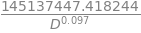

In [57]:
sf_ = Sf_l(0.84, 1, 568*1e6)
sf_

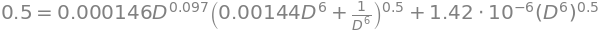

In [58]:
#Kt flexão e de torção
ktf, ktt =  2.216, 3.04
M = 938.14   #N.m - Momento de flexão - puramente alternado sm=0
T = 60     #N.m - Torque de torção considerando Tmin=0

sut = 568*1E6
nf = 2
pi = np.pi

#Tensões reais de flexão
flex = ktf*(32*M/(pi*D**3))
#Tensões reais de torção
torc = ktt*((16*T/2)/pi*D**3)

#Tensão de von-misses
sa = sqrt((flex**2) + (3*(torc**2)))
sm = sqrt(3*(torc**2)) #verficar - Esta condição é para sm=0 e ta=tm

#Critério de falha
falha = Eq((1/nf), (sa/sf_) + (sm/sut))

res = falha.evalf(3)
res

In [59]:
#Resolvendo numéricamente

import ZebraLib as zb

num = lambdify([D], res.rhs)

def resid(x, args):
    return num(x)- 1/nf

resultado = zb.robustNewton(resid, 1)
resultado